## Decision Tree Classifier

In [1]:
from sklearn.datasets import load_iris # type: ignore

In [6]:
iris = load_iris()

In [7]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [2]:
import pandas as pd # type: ignore
import numpy as np  # type: ignore
import matplotlib.pyplot as plt # type: ignore

In [8]:
x = pd.DataFrame(iris['data'],columns = ['sepal length','sepal width','petal length','petal width'])
x.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
y = iris['target']

In [10]:
from sklearn.model_selection import train_test_split # type: ignore
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [11]:
from sklearn.tree import DecisionTreeClassifier # type: ignore
treeclassifier = DecisionTreeClassifier()
treeclassifier.fit(x_train,y_train)

DecisionTreeClassifier()

[Text(0.3181818181818182, 0.9285714285714286, 'x[3] <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [40, 37, 43]'),
 Text(0.22727272727272727, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.4090909090909091, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.497\nsamples = 80\nvalue = [0, 37, 43]'),
 Text(0.18181818181818182, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.09090909090909091, 0.5, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(0.2727272727272727, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6363636363636364, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.159\nsamples = 46\nvalue = [0, 4, 42]'),
 Text(0.45454545454545453, 0.5, 'x[2] <= 5.35\ngini = 0.49\nsamples = 7\nvalue = [0, 3, 4]'),
 Text(0.36363636363636365, 0.35714285714285715, 'x[3] <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 3, 2]'),
 Text(0.2727272727272727, 0.21428571428571427, 'x[2] <= 4.95\ngini = 0.444\nsamples = 3\nvalu

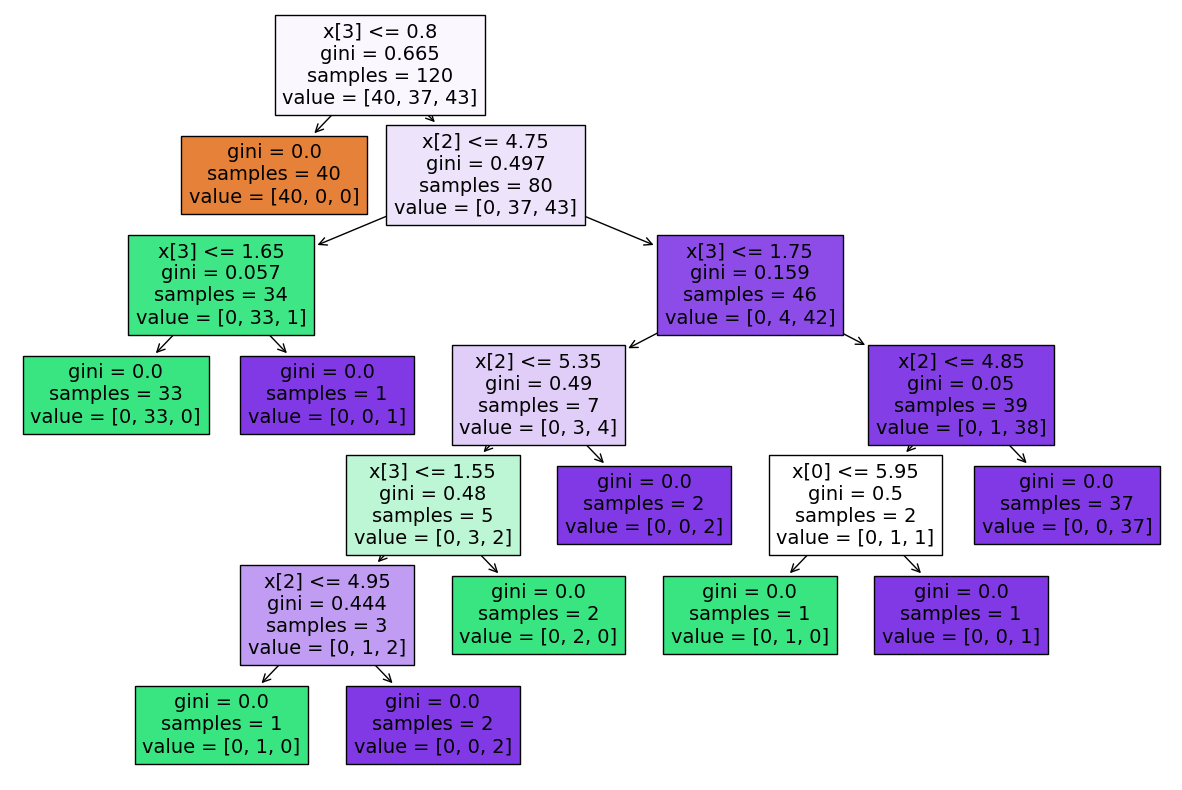

In [12]:
from sklearn import tree # type: ignore
plt.figure(figsize = (15,10))
tree.plot_tree(treeclassifier,filled = True)

In [13]:
y_pred = treeclassifier.predict(x_test)
y_pred

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2])

In [14]:
from sklearn.metrics import confusion_matrix,classification_report # type: ignore
cm = confusion_matrix(y_test,y_pred)
cm

array([[10,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  7]], dtype=int64)

In [15]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Decision Tree Prepruning and HyperParameter Tuning

In [16]:
param={
    'criterion':['gini','entropy', 'log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}

In [17]:
from sklearn.model_selection import GridSearchCV # type: ignore

In [18]:
treemodel = DecisionTreeClassifier()
grid = GridSearchCV(treemodel,param_grid=param,cv=5,scoring='accuracy')

In [19]:
import warnings
warnings.filterwarnings('ignore') 
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [20]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [21]:
grid.best_score_

0.95

In [22]:
y_pred = grid.predict(x_test)
y_pred

array([1, 2, 0, 1, 0, 1, 2, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 2, 2])

In [23]:
from sklearn.metrics import confusion_matrix,classification_report # type: ignore
cm = confusion_matrix(y_test,y_pred)
cm

array([[10,  0,  0],
       [ 0, 11,  2],
       [ 0,  0,  7]], dtype=int64)

In [24]:
from sklearn.metrics import accuracy_score # type: ignore
score = accuracy_score(y_test,y_pred)
score

0.9333333333333333

### Decision Tree Regression

In [25]:
from sklearn.datasets import load_diabetes #type: ignore

In [27]:
dataset = load_diabetes()
dataset

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [28]:
df_diabetes=pd.DataFrame(dataset.data, columns=['age',
  'sex',
  'bmi',
  'bp',
  's1',
  's2',
  's3',
  's4',
  's5',
  's6'])

In [29]:
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [30]:
np.round(df_diabetes.describe(),2)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00
mean,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00
std,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05
min,-0.11,-0.04,-0.09,-0.11,-0.13,-0.12,-0.10,-0.08,-0.13,-0.14
25%,-0.04,-0.04,-0.03,-0.04,-0.03,-0.03,-0.04,-0.04,-0.03,-0.03
50%,0.01,-0.04,-0.01,-0.01,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00
75%,0.04,0.05,0.03,0.04,0.03,0.03,0.03,0.03,0.03,0.03
max,0.11,0.05,0.17,0.13,0.15,0.20,0.18,0.19,0.13,0.14


In [31]:
X=df_diabetes
y=dataset['target']

In [32]:
from sklearn.model_selection import train_test_split # type: ignore
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [33]:
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
249,-0.012780,-0.044642,0.060618,0.052858,0.047965,0.029375,-0.017629,0.034309,0.070207,0.007207
389,-0.005515,0.050680,0.001339,-0.084856,-0.011201,-0.016658,0.048640,-0.039493,-0.041176,-0.088062
121,0.063504,-0.044642,0.017506,0.021872,0.008063,0.021546,-0.036038,0.034309,0.019907,0.011349
195,0.027178,0.050680,0.025051,0.014987,0.025950,0.048477,-0.039719,0.034309,0.007838,0.023775
69,0.016281,-0.044642,-0.046085,-0.005670,-0.075870,-0.061438,-0.013948,-0.039493,-0.051404,0.019633


In [34]:
X_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.197408,0.198359,0.394903,0.238375,0.192920,-0.128403,0.227110,0.314151,0.351570
sex,0.197408,1.000000,0.108261,0.221914,0.057674,0.180315,-0.379464,0.324882,0.150956,0.193322
bmi,0.198359,0.108261,1.000000,0.356324,0.226047,0.248146,-0.395021,0.412826,0.435505,0.358273
bp,0.394903,0.221914,0.356324,1.000000,0.238295,0.165632,-0.192505,0.249141,0.420236,0.368882
s1,0.238375,0.057674,0.226047,0.238295,1.000000,0.872781,0.006313,0.559626,0.566312,0.356280
s2,0.192920,0.180315,0.248146,0.165632,0.872781,1.000000,-0.265114,0.684840,0.325759,0.315890
s3,-0.128403,-0.379464,-0.395021,-0.192505,0.006313,-0.265114,1.000000,-0.754616,-0.370523,-0.297055
s4,0.227110,0.324882,0.412826,0.249141,0.559626,0.684840,-0.754616,1.000000,0.609983,0.436311
s5,0.314151,0.150956,0.435505,0.420236,0.566312,0.325759,-0.370523,0.609983,1.000000,0.490970
s6,0.351570,0.193322,0.358273,0.368882,0.356280,0.315890,-0.297055,0.436311,0.490970,1.000000


<Axes: >

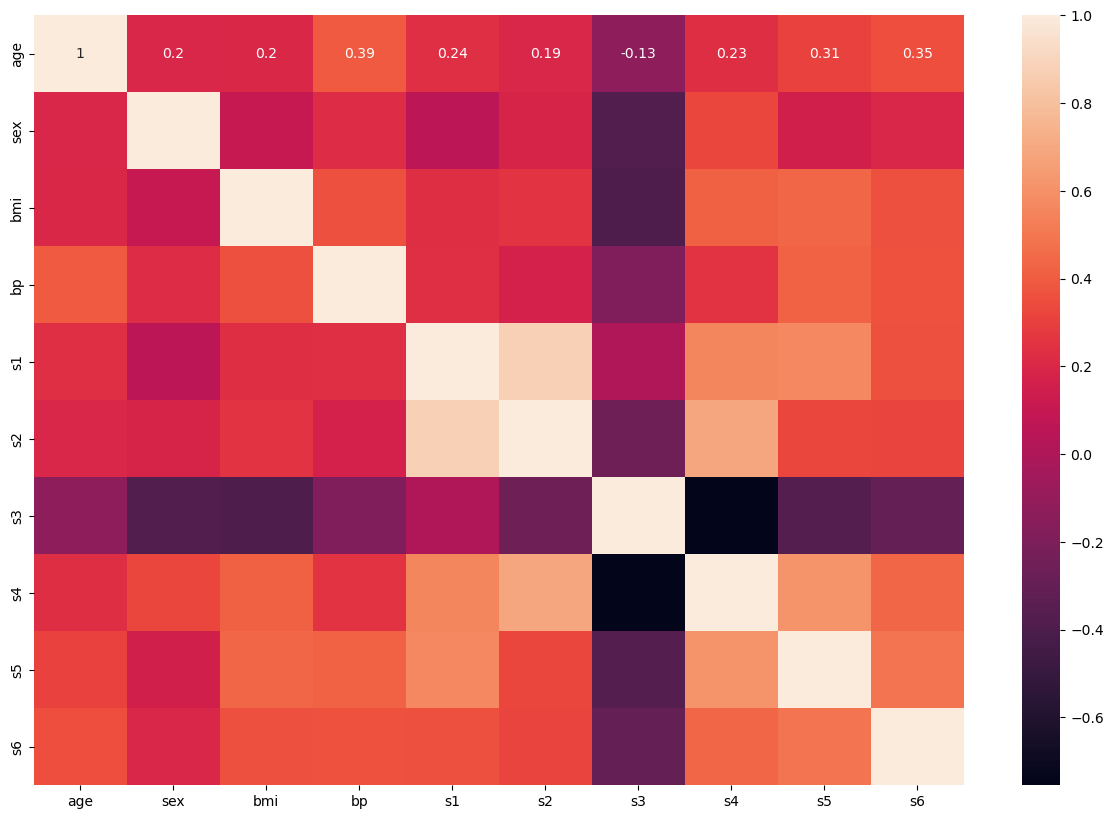

In [35]:
import seaborn as sns # type: ignore
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(), annot=True)

In [36]:
from sklearn.tree import DecisionTreeRegressor # type: ignore
regressor = DecisionTreeRegressor()

regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [37]:
param={
    'criterion':['squared_error','friedman_mse', 'absolute_error'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,10,15,20,25],
    'max_features':['auto','sqrt','log2']
}

In [38]:
param

{'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
 'splitter': ['best', 'random'],
 'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
 'max_features': ['auto', 'sqrt', 'log2']}

In [39]:
from sklearn.model_selection import GridSearchCV # type: ignore

In [40]:
regressor = DecisionTreeRegressor()
grid = GridSearchCV(regressor,param_grid=param,cv=5,scoring='neg_mean_squared_error')

In [41]:
import warnings
warnings.filterwarnings('ignore') 
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [42]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [45]:
y_pred = grid.predict(X_test)